# 画图

In [3]:
%matplotlib notebook
import imp, time
from collections import Counter, OrderedDict, defaultdict, deque, namedtuple
import matplotlib.pyplot as plt
import numpy as np, sympy as sy
from sklearn.cluster import KMeans
from scipy import constants as const, signal
from scipy.fftpack import fft, hilbert, ifft
from scipy.optimize import curve_fit
from scipy.optimize import least_squares as ls
from sympy import diff, symbols
import pandas as pd
import qulab.optimize
from qulab import waveform_new, data2imag
from qulab.storage.utils import save

op = imp.reload(qulab.optimize)
wn = imp.reload(waveform_new)
di = imp.reload(data2imag)

read = di.read
write = di.write

In [3]:
x = Record.objects(title='S21vsFlux').order_by('-finished_time')[0]
x

Record(title=S21vsFlux, finished_time=2020-08-05 17:05:19.470959, tags=['q1'])

In [4]:
data, ID, comment, tags, name, finishtime = read(title='S21vsFlux_awgoffset',which=0)
np.shape(data[2])

(21, 201, 10)

# qubit工作点

In [534]:
atributte = ['q_name','inst','T_bias','specfunc','bias','zpulse','f_lo','delta','f_ex','delta_ex','alpha',\
             'power_ex','power_rabi','pi_len','T1','state','timing']
qubit = namedtuple('qubit',atributte,defaults=[None]*len(atributte))


## 保存qubit工作点

In [561]:
qstate = []
def tuple2dict(q):
    for i in q:
        qstate.append(i._asdict())
    return qstate

bit = [q1,q2,q3,q4,q5,q6,q7,q8,q9,q10]
filepath = save('QubitState','qubitstate',state = tuple2dict(bit),base_path=r'D:\skzhao\file_name')
with open(r'D:\skzhao\file_name\qubit_state.txt', mode='a') as filename:
    filename.write(str(filepath))
    filename.write('\n')
print(filepath)

D:\skzhao\file_name\2020\0825\QubitState\qubitstate_20200825180630.npz


In [139]:
q5

qubit(q_name='q5', inst={'dc': 'dc01', 'z_awg': 'awg131', 'z_ch': [5], 'ex_awg': 'awg133', 'ex_ch': [4, 8], 'ex_lo': 'psg_ex1', 'com': 'com5'}, T_bias=[2.215, -0.429], specfunc=4.19164410358478*sqrt(Abs(cos(1.7485941806689*x + 6.21233376830937))) - 0.160784944997021, bias=0.35, zpulse=None, f_lo=array([6.51e+09]), delta=array([50000000.]), f_ex=array([4.095e+09]), delta_ex=array([1.1e+08]), alpha=265400000.0, power_ex=60, power_rabi=40, pi_len=17.8, T1=None, state=[{'q5': {'offset': -0.5, 'load': 'high Z', 'error': '+0'}, 'q4': {'offset': 0.0, 'load': 'high Z', 'error': '+0'}, 'q8': {'offset': 0.0, 'load': 'high Z', 'error': '+0'}, 'q6': {'offset': 0.0, 'load': 'high Z', 'error': '+0'}, 'q3': {'offset': 0.0, 'load': 'high Z', 'error': '+0'}, 'q2': {'offset': 0.0, 'load': 'high Z', 'error': '+0'}, 'q1': {'offset': 0.0, 'load': 'high Z', 'error': '+0'}, 'q7': {'offset': 0.0, 'load': 'high Z', 'error': '+0'}, 'jpa': {'offset': 0.0, 'load': 'high Z', 'error': '+0'}, 'q9': {'offset': 0.0, '

## 提取qubit工作点

In [535]:
fl = np.loadtxt(r'D:\skzhao\file_name\qubit_state.txt',dtype='str')
f = str(fl[-2])
data = np.load(f,allow_pickle=True)
def dict2tuple(q):
    for i,k in enumerate(q):
        attr = []
        for j in atributte:
            if j in k:
                attr.append(k[j])
            else:
                attr.append(None)
        globals()['q%d'%(i+1)] = qubit(*attr)

dict2tuple(data['state'])
print(f)

D:\skzhao\file_name\2020\0825\QubitState\qubitstate_20200825095506.npz


In [536]:
q1

qubit(q_name='q1', inst={'dc': 'dc03', 'z_awg': 'awg131', 'z_ch': [8], 'ex_awg': 'awg133', 'ex_ch': [3, 7], 'ex_lo': 'psg_ex1', 'com': 'com3'}, T_bias=[1.132, 0.3], specfunc=0.541605287359199*sqrt(Abs(cos(3.70594731677801*x + 2.92055965298964))) + 3.35424619070488, bias=0, zpulse=None, f_lo=array([6.535e+09]), delta=array([50000000.]), f_ex=array([5.161e+09]), delta_ex=array([1.1e+08]), alpha=269800000.0, power_ex=60, power_rabi=30, pi_len=16, T1=23016.178849233776, state=[{'q5': {'offset': 0.0, 'load': 'high Z', 'error': '+0'}, 'q4': {'offset': 0.0, 'load': 'high Z', 'error': '+0'}, 'q8': {'offset': 0.0, 'load': 'high Z', 'error': '+0'}, 'q6': {'offset': 0.0, 'load': 'high Z', 'error': '+0'}, 'q3': {'offset': 0.0, 'load': 'high Z', 'error': '+0'}, 'q2': {'offset': 0.0, 'load': 'high Z', 'error': '+0'}, 'q1': {'offset': 0.78, 'load': 'high Z', 'error': '+0'}, 'q7': {'offset': 0.0, 'load': 'high Z', 'error': '+0'}, 'jpa': {'offset': 0.0, 'load': 'high Z', 'error': '+0'}, 'q10': {'offset

# 查看图形

<IPython.core.display.Javascript object>


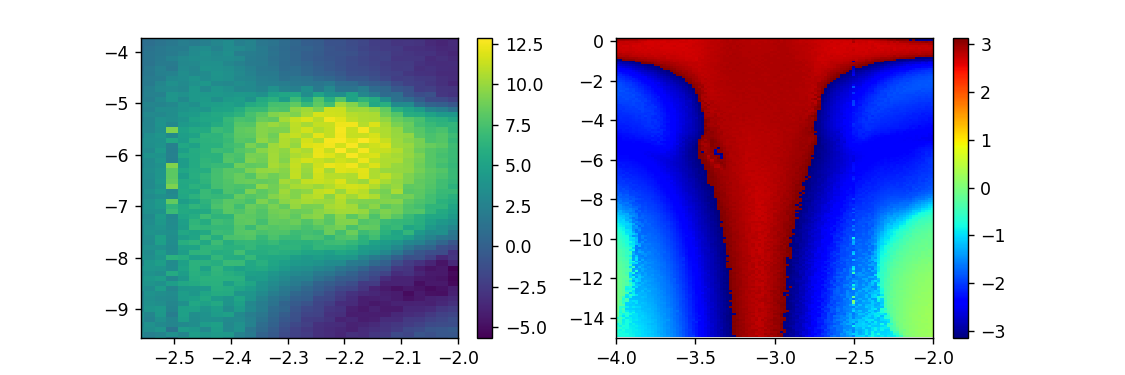

['bluefors_jpa_xue', 'fcenter=6700000000.0'] 2020-08-26 20:12:55.150697


In [5]:
value,num,tags,finishtime = write(title='BiasvsPump',phase='phase',height=3,which=0,peak=11200,dB=True)
print(tags,finishtime)

<IPython.core.display.Javascript object>


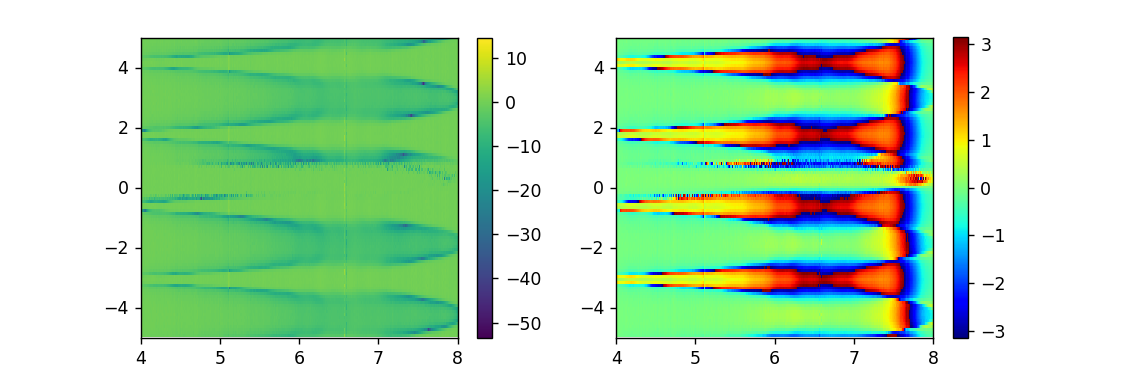

['bluefors_jpa_xue'] 2020-08-26 09:54:15.663677


In [695]:
value,num,tags,finishtime = write(title='S21vsFlux',phase='phase',height=3,which=0,peak=1120,dB=True)
print(tags,finishtime)

In [512]:
6.6178-6.6165

0.0012999999999996348

In [116]:
x, y , s = value[0][0], value[0][1], value[0][2]
wlist = [((op.RowToRipe().fourier(y,np.abs(i)))[0]) for i in s]

<IPython.core.display.Javascript object>


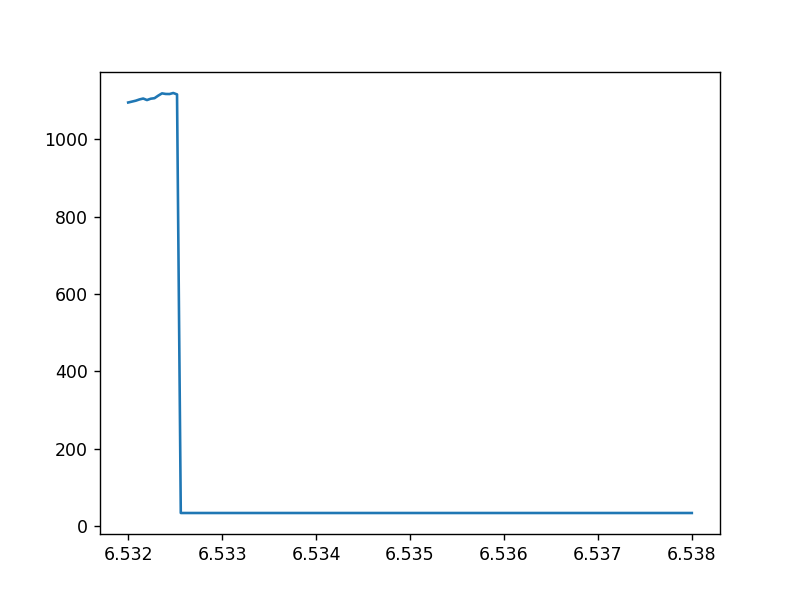

NameError: name 'wlist' is not defined

In [155]:
plt.figure()
plt.plot(x,wlist,'.-')
plt.show()

<IPython.core.display.Javascript object>


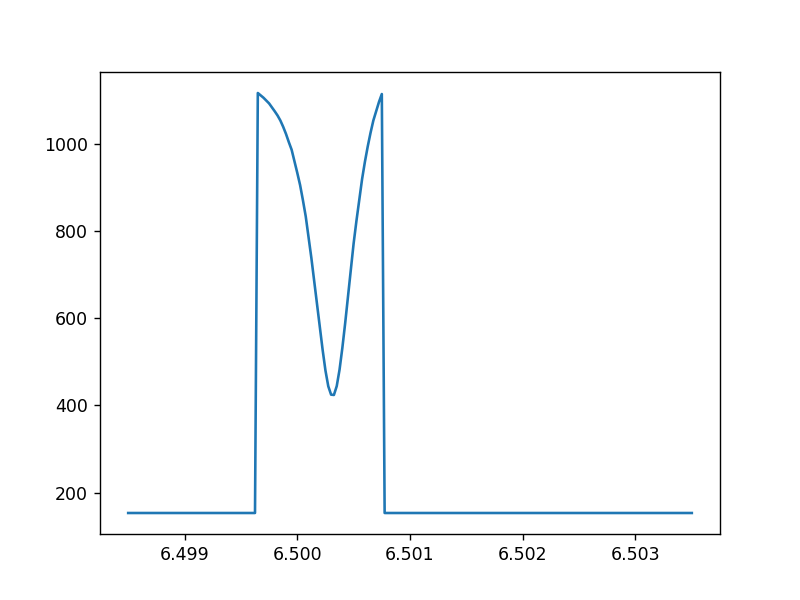

In [529]:
plt.figure(num='S21vsPower')
x, y  = value[0][1],value[0][2][1]
plt.plot(x,np.abs(y))
plt.show()

In [58]:
np.savez('s21.npz',x=x,y=y)

<IPython.core.display.Javascript object>


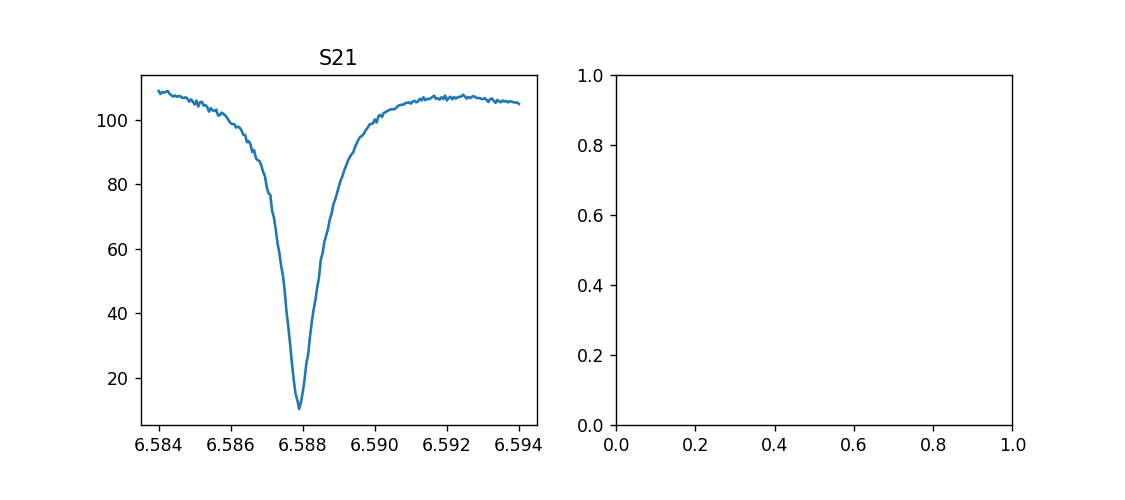

['q6'] 2020-08-24 15:58:03.622519


In [292]:
value,num,tags,finishtime = write(height=4,which=3,peak=1120)
print(tags,finishtime)

In [151]:
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[0].plot(value[0][0],np.abs(value[0][1]))
plt.show()

# 拟合Q值

In [615]:
data, ID, comment, tags, name, finishtime = read(title='S21',which=0)
np.shape(data[1])

(201, 1)

In [ ]:
from qulab import getplotlydat
gpd = imp.reload(getplotlydat)
path = r'D:\step1\14Q1changePwr.html'
x, y, z = gpd.gethtmldata(path,flag='x'), gpd.gethtmldata(path,flag='y'), gpd.gethtmldata(path,flag='z')


<IPython.core.display.Javascript object>


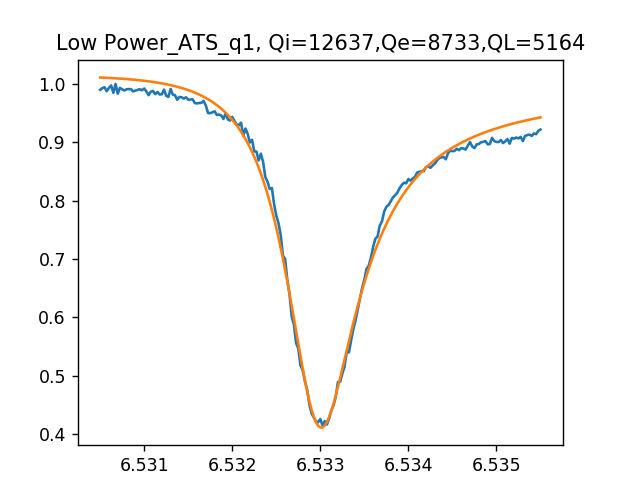

In [616]:
f, s21 = data[0][:,0]/1e9, data[1][:,0]
f0, Qi, Qe, QL, phi, f, s = op.Cavity_fit().fitCavity(f,s21)
plt.figure(figsize=(5,4))
plt.plot(f,np.abs(s))
plt.title(f'Low Power_ATS_q1, Qi={int(Qi)},Qe={int(Qe)},QL={int(QL)}')
plt.plot(f,1/np.abs(op.Cavity_fit().invS21(f, f0, Qi, Qe, phi)))
plt.show()

In [333]:
tag = ''
for i in tags:
    tag += i
save('S21',tag,base_path=r'D:\skzhao\data\ffsu\Nb10bits_2_cuqiang',row=data[0],col=data[1])

WindowsPath('D:/skzhao/data/ffsu/Nb10bits_2_cuqiang/2020/0824/S21/q6_20200824171301.npz')

In [43]:
x, y = value[0][0], value[0][1]
fig = plt.gcf()
ax = plt.getp(fig,'axes')
w,yt,amp = op.RowToRipe().fourier(x,np.abs(y))
ax[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
ax[1].set_title('$W=%.3fMHz$'%(w*1000))
plt.show()

# 移动偏置看谱

<IPython.core.display.Javascript object>


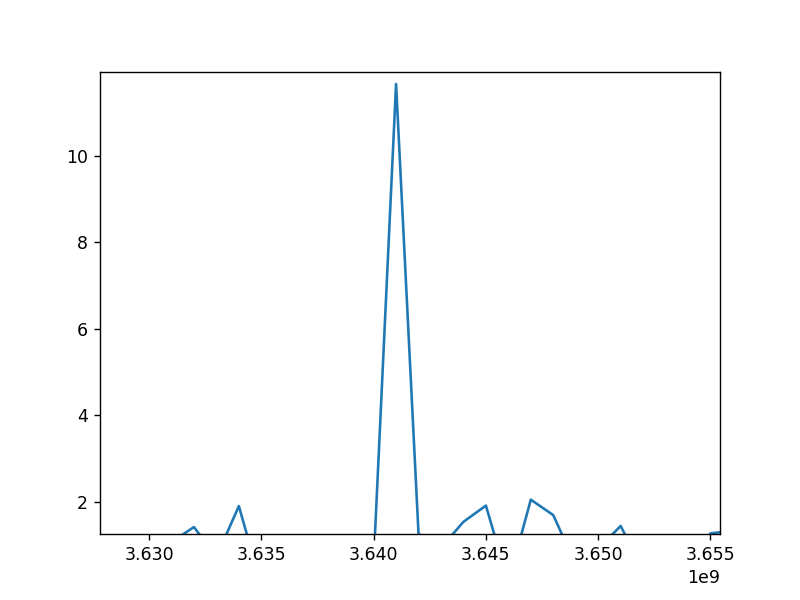

In [600]:
fig = plt.figure(num='specvsbias')

In [601]:
data, ID, comment, tags, name, finishtime = read(title='singlespec',which=0)
np.shape(data[1])

(400, 1)

In [602]:
plt.figure(num='specvsbias')
plt.plot(data[0],np.abs(data[1]))
plt.show()

In [343]:
tag = ''
for i in tags:
    tag += i
save('singlespec',tag,base_path=r'D:\skzhao\data\ffsu\Nb10bits_2_cuqiang',row=data[0],col=data[1])

WindowsPath('D:/skzhao/data/ffsu/Nb10bits_2_cuqiang/2020/0824/singlespec/Nbq6_20200824171544.npz')

# 读出点

In [365]:
data, ID, comment, tags, name, finishtime = read(title='readOp',which=0)
np.shape(data[1])

(2, 201, 1)

<IPython.core.display.Javascript object>


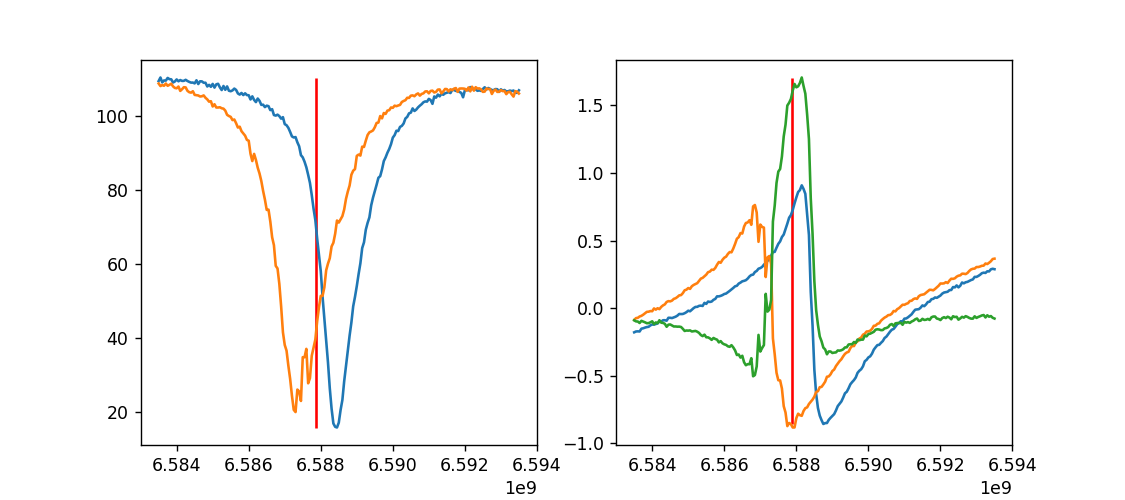

In [367]:
f_lo = []
f_op, s_op = data[1], data[2]
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
for i in range(np.shape(data[1])[2]):
    f, s_off, s_on = f_op[0,:,i], s_op[0,:,i], s_op[1,:,i]
    f_lo1 = (f[np.argmin(np.abs(s_off))] + f[np.argmin(np.abs(s_on))])/2
    x_off, y_off = op.RowToRipe().deductPhase(f,s_off)
    x_on, y_on = op.RowToRipe().deductPhase(f,s_on)
    anglediff = (np.angle(y_off[0])-np.angle(y_on[0]))
    index = np.abs(anglediff).argmax(axis=0)
    #index = np.abs(s_off).argmin(axis=0)
    f_lo.append(f[index] if np.abs(f[index]-f_lo1)<0.1e6 else f_lo1)
    axes[0].plot(f_op[:,:,i].T,np.abs(s_op[:,:,i].T))
    axes[0].vlines(f_lo,np.max(np.abs(s_op[:,:,i].T)),np.min(np.abs(s_op[:,:,i].T)),'r')
    axes[1].plot(x_off,np.angle(y_off[0]))
    axes[1].plot(x_on,np.angle(y_on[0]))
    axes[1].plot(x_off,anglediff)
    axes[1].vlines(f_lo,np.max(anglediff),np.min(np.angle(y_off[0])),'r')
plt.show()

In [368]:
tag = ''
for i in tags:
    tag += i
save('readOp',tag,base_path=r'D:\skzhao\data\ffsu\Nb10bits_2_cuqiang',row=data[1],col=data[1])

WindowsPath('D:/skzhao/data/ffsu/Nb10bits_2_cuqiang/2020/0824/readOp/q6_20200824172750.npz')

# Zpulse_offset

<IPython.core.display.Javascript object>


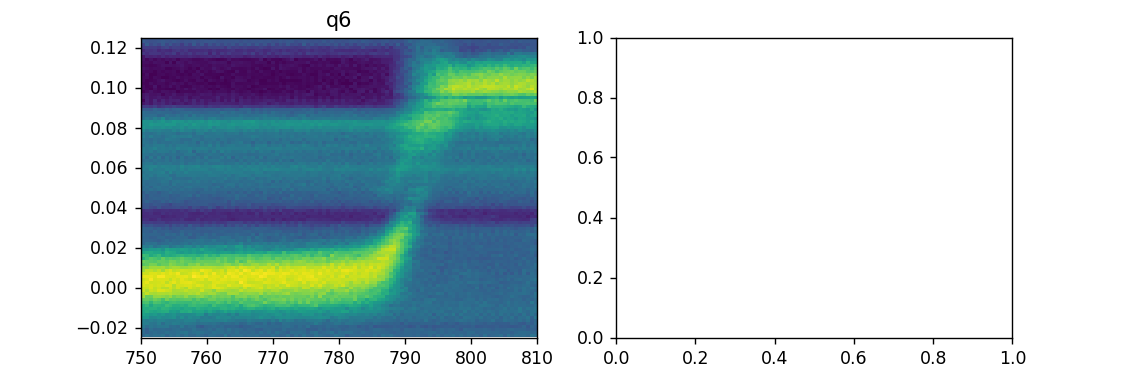

['q6'] 2020-06-11 13:02:53.376368


In [89]:
value,num,tags,finished_time = write(title='zPulse_offset',height=3,which=7,peak=1000)
print(tags,finished_time)

<IPython.core.display.Javascript object>


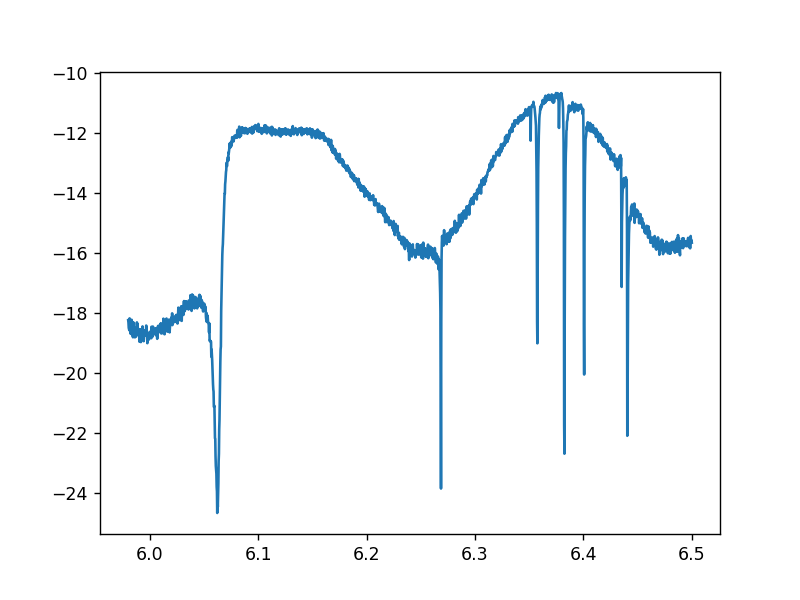

In [47]:
plt.figure()
plt.plot(value[0][1],value[0][2][0])
plt.show()

In [1577]:
0.025/0.15*101

16.833333333333336

In [15]:
v,t,s = value[0][0][:],value[0][1],value[0][2][:,:]
v,f = op.RowToRipe().profile(v,t,s,peak=15,axis=0)
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[0].plot(f,v,'r-o')
plt.show()

In [17]:
f_new, v_new = np.abs(f-np.max(f)), v[::-1]

<IPython.core.display.Javascript object>


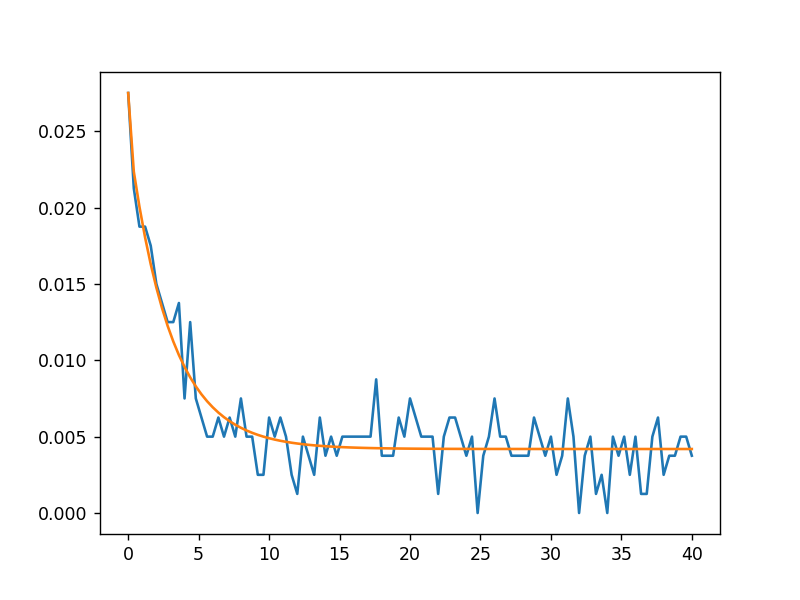

In [18]:
plt.figure()
plt.plot((f_new[:]-np.min(f_new[:])),v[:])
plt.show()

In [19]:
x,y=(f_new[:]-np.min(f_new[:])),v[:]
a, b, c, d, e = op.TwoExp_Fit().fitTwoexp(x,y)
z = a*np.exp(b*x) + c*np.exp(d*x) + e 
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[0].plot(x,z)
plt.show()

(0.02181945161130762, -0.3556120421284931, 0.004363890322261524, -0.07112240842569863, 0.0)


d:\qulab\qulab\optimize.py:423: RuntimeWarning: overflow encountered in exp
  return np.sum((a*np.exp(b*x) + c*np.exp(d*x) + e - y)**2)
d:\qulab\qulab\optimize.py:423: RuntimeWarning: overflow encountered in square
  return np.sum((a*np.exp(b*x) + c*np.exp(d*x) + e - y)**2)


In [21]:
1/d

-2.956788087415525

<IPython.core.display.Javascript object>


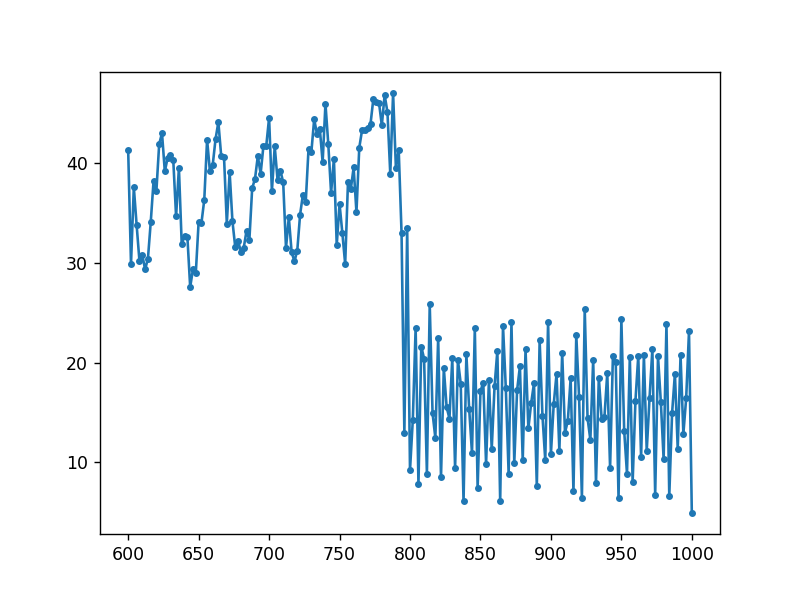

In [996]:
x,y = value[0][1],np.abs(value[0][2][1])
# a,b,c,d,e,f = op.Lorentz_Fit().fitLorentz(x,y)
# z = a/(1.0+c*(x-b)**2)+d
# fig = plt.gcf()
# ax = plt.getp(fig,'axes')
plt.figure()
plt.plot(x,y,'-o',markersize=3)
# plt.plot(x,y,'.')
plt.show()

# RamseyZpulse

In [24]:
data, ID, comment, tags, name, finishtime = read(title='ramseyZpulse',which=2)
t_rz, poplist_rz = data[0][:,0], data[1][:]
print(tags,finishtime)

['q6'] 2020-06-12 14:32:13.036013


In [56]:
def test(theta):
    j = 0
    theta_new = []
    theta_new.append(theta[0])
    for i,j in enumerate(theta[1:],start=1):
        while 1:
            if theta_new[i-1]>j+0.8:
                j += np.pi
            else:
                break
        theta_new.append(j)
    return np.array(theta_new)

<IPython.core.display.Javascript object>


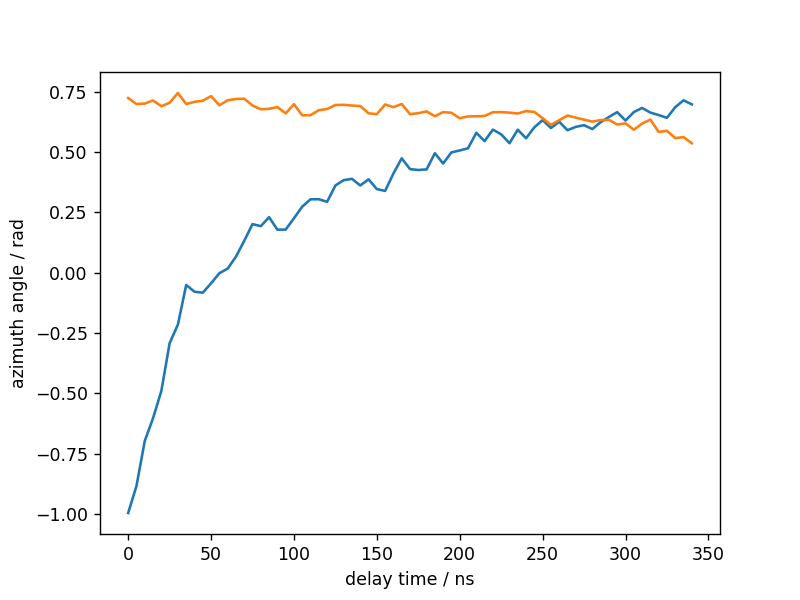

In [23]:
coordinate = [[1-2*j[i] for i in range(2)] for j in poplist_rz]
theta = np.array([np.arctan(i[1]/i[0]) for i in coordinate])
# theta = np.array([theta[i] if i<47 else theta[i]-np.pi for i in range(len(theta))])
# theta = test(theta)
plt.figure()
plt.plot(t_rz,theta)
plt.xlabel('delay time / ns')
plt.ylabel('azimuth angle / rad')
plt.show()

In [25]:
coordinate = [[1-2*j[i] for i in range(2)] for j in poplist_rz]
theta = np.array([np.arctan(i[1]/i[0]) for i in coordinate])
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[0].plot(t_rz,theta)
plt.show()

In [1017]:
j = 0
theta_new = []
theta_new.append(theta[0])
for i,j in enumerate(theta[1:],start=1):
    if theta_new[i-1]-j>np.pi/2:
        theta_new.append(j+np.pi/2)
    elif theta_new[i-1]-j<-np.pi/2:
        theta_new.append(j-np.pi/2)
    else:
        theta_new.append(j)

<IPython.core.display.Javascript object>


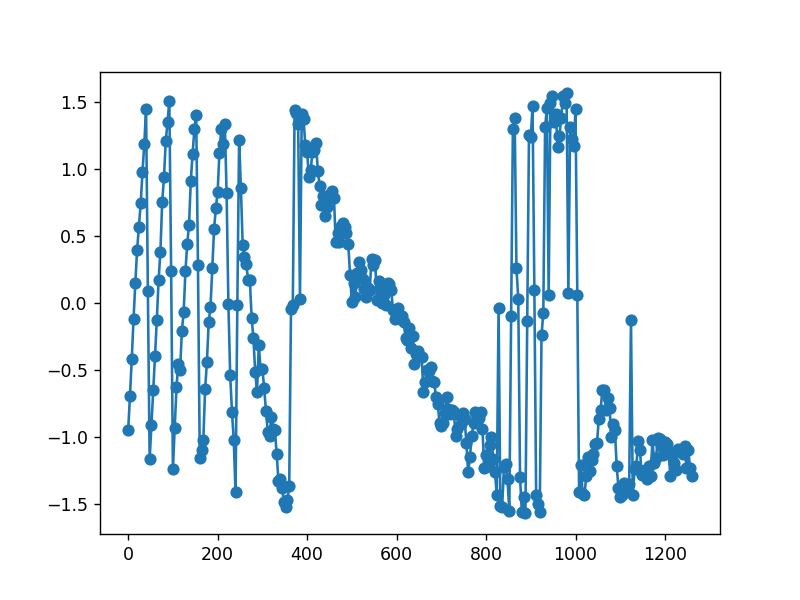

In [1019]:
plt.figure()
plt.plot(t_rz,theta_new,'-o')
plt.show()

In [1016]:
np.shape(theta_new)

(335,)

In [13]:
a, b, c, d, e = op.TwoExp_Fit().fitTwoexp(t_rz,theta)
z = a*np.exp(b*t_rz) + c*np.exp(d*t_rz) + e
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[0].plot(t_rz,z)
plt.show()

(-1.2305019961822254, -0.019269795441661734, -0.2461003992364451, -0.003853959088332347, 0.7487539570727105)


d:\qulab\qulab\optimize.py:423: RuntimeWarning: overflow encountered in square
  return np.sum((a*np.exp(b*x) + c*np.exp(d*x) + e - y)**2)
d:\qulab\qulab\optimize.py:423: RuntimeWarning: overflow encountered in exp
  return np.sum((a*np.exp(b*x) + c*np.exp(d*x) + e - y)**2)


In [1782]:
print(1/b,1/d)

-35.332317708042 -330.1660583068357


# RB

['q10', 'reference'] 2020-07-03 23:52:47.370461


<IPython.core.display.Javascript object>


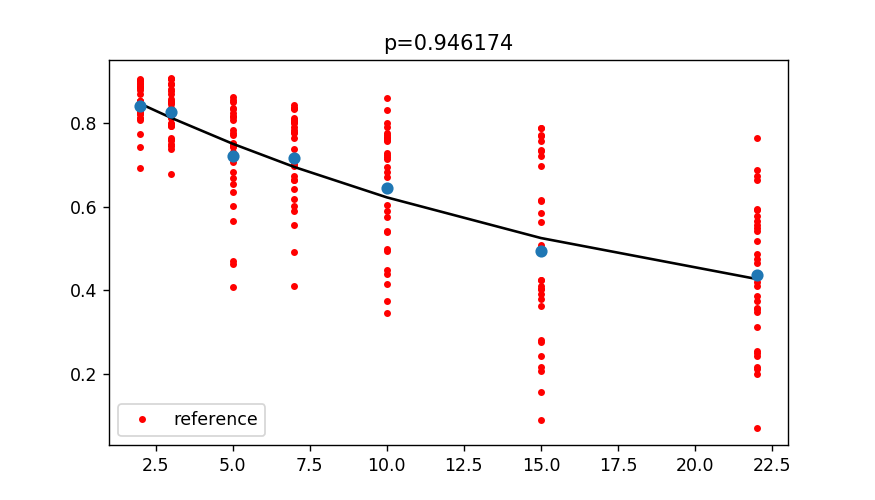

In [203]:
data, ID, comment, tags, name, finishtime = read(title='RB_waveform',which=0)
print(tags,finishtime)
n, pop = data[0][:,0],data[1]
x = np.meshgrid(range(np.shape(pop)[1]),n)[1]
plt.figure(figsize=(7,4))
x = np.meshgrid(range(np.shape(pop)[1]),n)[1]
plt.plot(x.flatten(),pop.flatten(),'r.',label=tags[1])
plt.legend(loc='lower left')
x, y = n, np.mean(pop,axis=1)
A,B,p = op.RB_Fit().fitRB(x,y)
z = A*p**x+B
plt.plot(x,z,'k')
plt.plot(x,y,'o')
plt.title('p=%f'%p)
plt.show()

1593098769.7224395

In [267]:
Pref, Pgate, d = 0.996725, 0.996521, 2**(1)
Rgate = (1-Pgate/Pref)*(1-1/d)
Rgate

0.00010233514760843443

In [268]:
1-0.00010233514760843443

0.9998976648523916

# pi脉冲优化

<IPython.core.display.Javascript object>


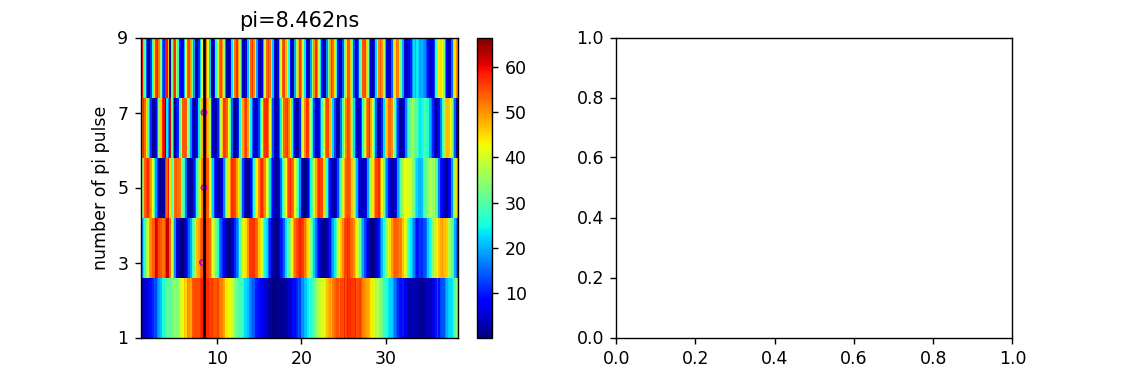

['q6'] 2020-08-24 17:44:25.749307


In [385]:
value,num,tags,finishtime = write(title='pipulseOpt',height=3,which=0,peak=1120)
print(tags,finishtime)

In [386]:
x, y, s = value[0][0],value[0][1], np.abs(value[0][2])
index = y[np.argmax(np.abs(s),axis=1)[0]]
y = np.array([op.RowToRipe().firstMax(y,z,num=8.5,peakpercent=0.9,insitu=True) for z in s])
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[0].set_xlabel('time / ns')
ax[0].set_yticks(x)
ax[0].set_ylabel('number of pi pulse')
ax[0].scatter(y[1:-1],x[1:-1],marker='.',c='',edgecolors='m')
ax[0].vlines(np.mean(y),np.max(x),np.min(x))
ax[0].set_title('pi=%.3fns'%np.mean(y))
plt.show()

<IPython.core.display.Javascript object>


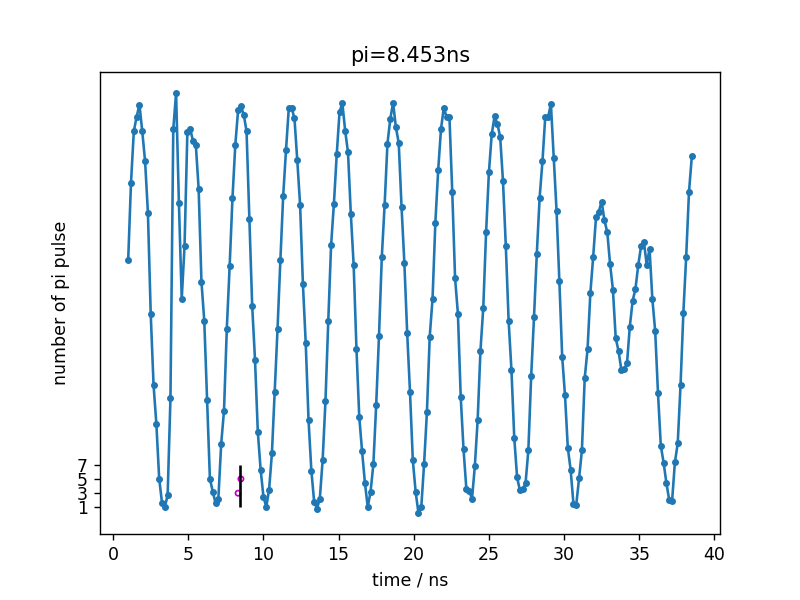

In [383]:
x,y = value[0][1],np.abs(value[0][2][2])
# a,b,c,d,e,f = op.Lorentz_Fit().fitLorentz(x,y)
# z = a/(1.0+c*(x-b)**2)+d
# fig = plt.gcf()
# ax = plt.getp(fig,'axes')
plt.figure()
plt.plot(x,y,'-o',markersize=3)
# plt.plot(x,y,'.')
plt.show()

# AllXY drag

['q1'] 2020-06-30 23:10:10.398698


<IPython.core.display.Javascript object>


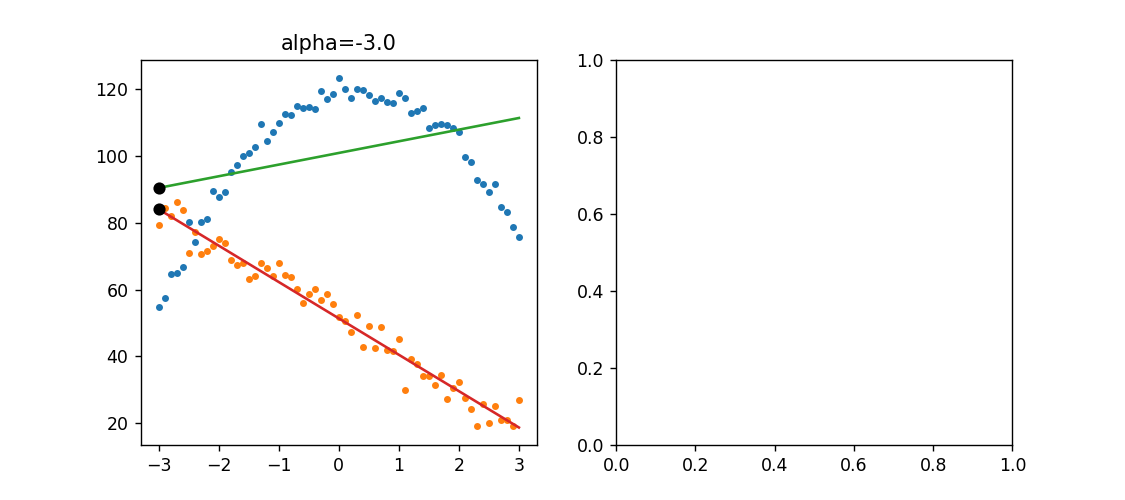

In [8]:
data, ID, comment, tags, name, finishtime = read(title='AllXYdragdetune',which=0)
print(tags,finishtime)
fall, sall = data[0],data[1]
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(9,4))
l = np.shape(fall)[0]//2
f1, f2, s1, s2 = fall[:l,0], fall[l:,0], np.abs(sall[:l,0]), np.abs(sall[l:,0])
z1 = np.poly1d(np.polyfit(f1,s1,1))(f1)
z2 = np.poly1d(np.polyfit(f2,s2,1))(f2)
index = np.argmin(np.abs(z1-z2))
axes[0].plot(np.array([f1,f2]).T,np.array([s1,s2]).T,'.')
axes[0].plot(np.array([f1,f2]).T,np.array([z1,z2]).T)
# axes[0].plot(fall[l:,:],np.abs(sall[l:,:]))
axes[0].plot([f1[index],f2[index]],[z1[index],z2[index]],'ko')
axes[0].set_title(f'alpha={round(f1[index],3)}')
plt.show()

# HD

In [396]:
data, ID, comment, tags, name, finishtime = read(title='dragcoefHD',which=5)
print(tags,finishtime)

['q3'] 2020-06-25 15:55:51.476244


<IPython.core.display.Javascript object>


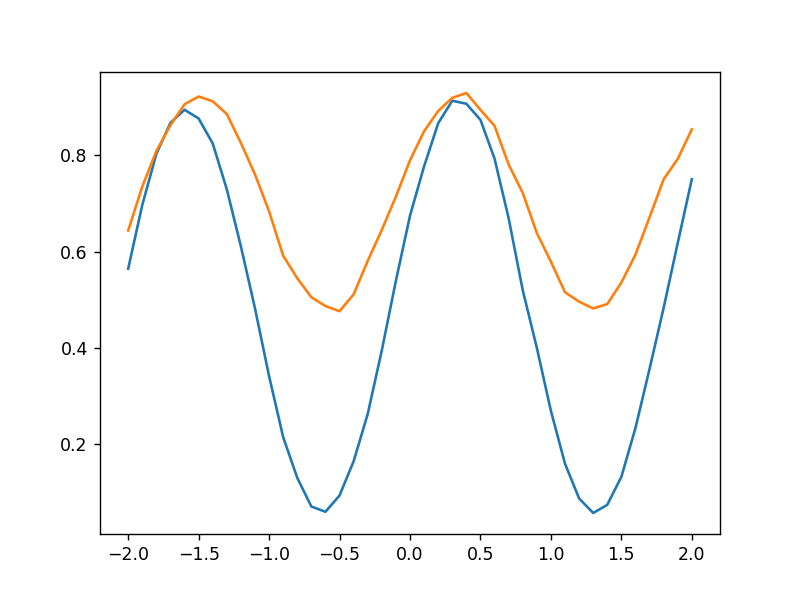

In [395]:
x, y = data[0][:,0], data[1][:,0]
plt.figure()
plt.plot(x,y)
plt.show()

In [397]:
x, y = data[0][:,0], data[1][:,0]
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[0].plot(x,y)
plt.show()

# 临界线

In [405]:
data, ID, comment, tags, name, finishtime = read(title='threshHold',which=0)
print(tags,finishtime)

['q6'] 2020-08-24 17:55:33.325843


<IPython.core.display.Javascript object>


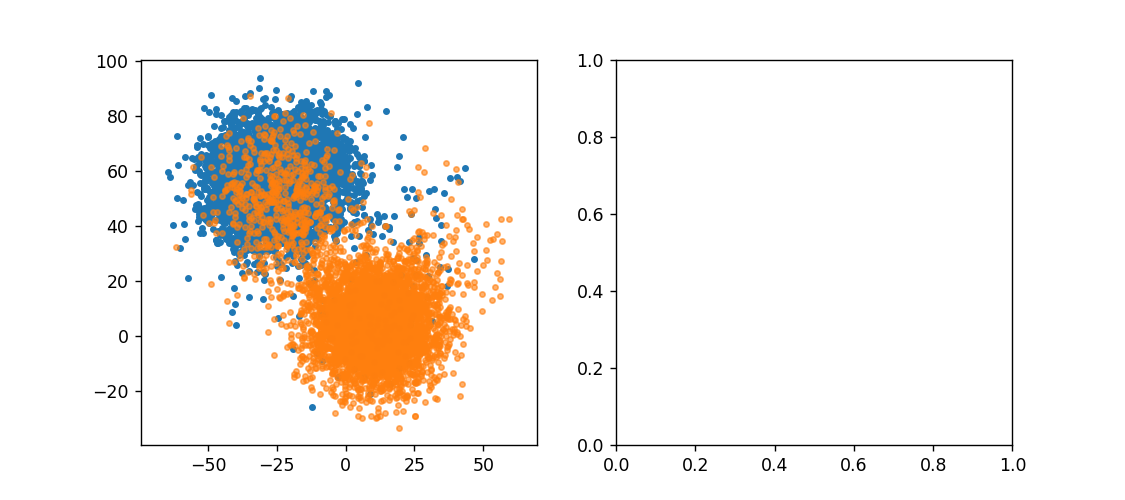

In [406]:
s_st = data[1]
n = np.shape(s_st)[2]
num = n//2+n%2
fig, axes = plt.subplots(ncols=2,nrows=num,figsize=(9,4*num))
for i in range(n):
    s_off, s_on = s_st[0,:,i], s_st[1,:,i]
    ax = axes[i//2][i%2] if num>1 else axes[i]
    ax.plot(np.real(s_off),np.imag(s_off),'.')
    ax.plot(np.real(s_on),np.imag(s_on),'.',alpha=0.6)
#     ax.vlines([0],10,-100)
#     ax.hlines([0],-10,100)
    ax.axis('equal')
plt.show()

In [407]:
tag = ''
for i in tags:
    tag += i
save('threshHold',tag,base_path=r'D:\skzhao\data\ffsu\Nb10bits_2_cuqiang',row=data[1])

WindowsPath('D:/skzhao/data/ffsu/Nb10bits_2_cuqiang/2020/0824/threshHold/q6_20200824200935.npz')

# Crosstalk矩阵

In [13]:
z_crosstalk = np.ones((10,10))

<IPython.core.display.Javascript object>


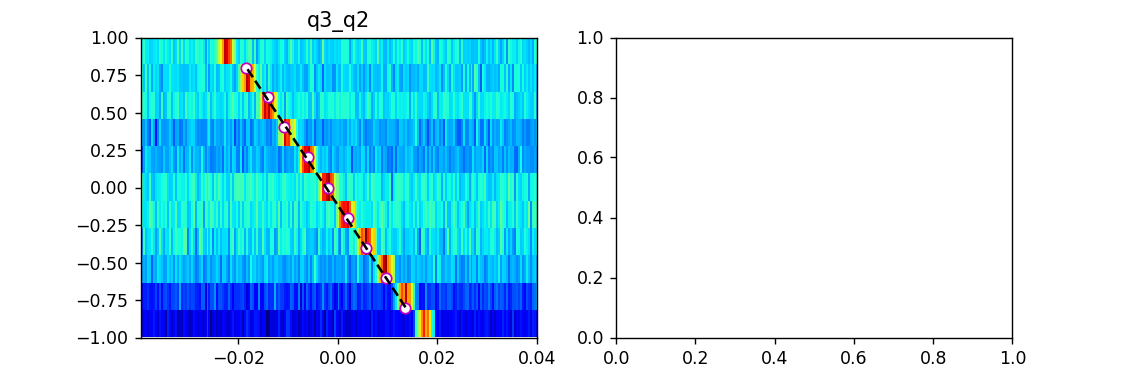

['q3_q2'] 2020-04-01 17:59:51.812673


In [18]:
value,num,tags,finishtime = write(height=3,title='crosstalkSpec',which=8,peak=1120)
print(tags,finishtime)

In [ ]:
'q6-q3','q4_q7','q4-q6','q4-q5'

In [20]:
target = 1
v, f, s = value[target-1][0], value[target-1][1], value[target-1][2]
peak = (np.max(np.abs(s))+np.min(np.abs(s))) / 3
v, f, res = op.Crosstalk_Fit(peak=peak).fitCrosstalk(v,f,s,classify=False)
z = res[0]*f + res[1]
row, col = eval(tags[0][1])-1, eval(tags[0][-1])-1
z_crosstalk[row,col] = -1/res[0]
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[target-1].scatter(f[1:-1],v[1:-1],marker='o',c='w',edgecolors='m')
ax[target-1].plot(f[1:-1],z[1:-1],'k--')
plt.show()

In [174]:
qname = ['q2','q3','q4','q5']
pd.DataFrame(z_crosstalk.T[1:5,1:5],columns=qname,index=qname)

q2        q3        q4        q5
q2  1.000000 -0.011626 -0.003775 -0.007910
q3  0.019994  1.000000 -0.017023 -0.007725
q4  0.020027  0.021286  1.000000 -0.022010
q5  0.016164  0.014805  0.013947  1.000000

In [116]:
old = np.array([[ 1.        , -0.00614072,  0.00237171,  0.00339285,  0.01229189],
       [ 0.01965284,  1.        , -0.01015246, -0.00295805, -0.00609832],
       [ 0.01144612,  0.02177006,  1.        , -0.01671896, -0.00728347],
       [ 0.01140976,  0.02193547,  0.02581161,  1.        , -0.01872843],
       [ 0.00925843,  0.01711204,  0.01496927,  0.01558848,  1.        ]])

In [188]:
qname = ['q2','q3','q4','q5']
pd.DataFrame(old[1:5,1:5],columns=qname,index=qname)

q2        q3        q4        q5
q2  1.000000 -0.010152 -0.002958 -0.006098
q3  0.021770  1.000000 -0.016719 -0.007283
q4  0.021935  0.025812  1.000000 -0.018728
q5  0.017112  0.014969  0.015588  1.000000

In [189]:
z = z_crosstalk.T[1:5,1:5] - old[1:5,1:5]
qname = ['q2','q3','q4','q5']
pd.DataFrame(z,columns=qname,index=qname)

q2        q3        q4        q5
q2  0.000000 -0.001474 -0.000817 -0.001812
q3 -0.001776  0.000000 -0.000304 -0.000442
q4 -0.001909 -0.004526  0.000000 -0.003282
q5 -0.000948 -0.000164 -0.001641  0.000000

In [176]:
save('crosstalk_cali','xue_crosstalk_q2_5',mat=z_crosstalk.T)

WindowsPath('D:/QuLabData/2020/0401/crosstalk_cali/xue_crosstalk_q2_5_20200401211425.npz')

# 拟合二维谱

In [665]:
specfunc = {}
x = sy.Symbol('x',real=True)

<IPython.core.display.Javascript object>


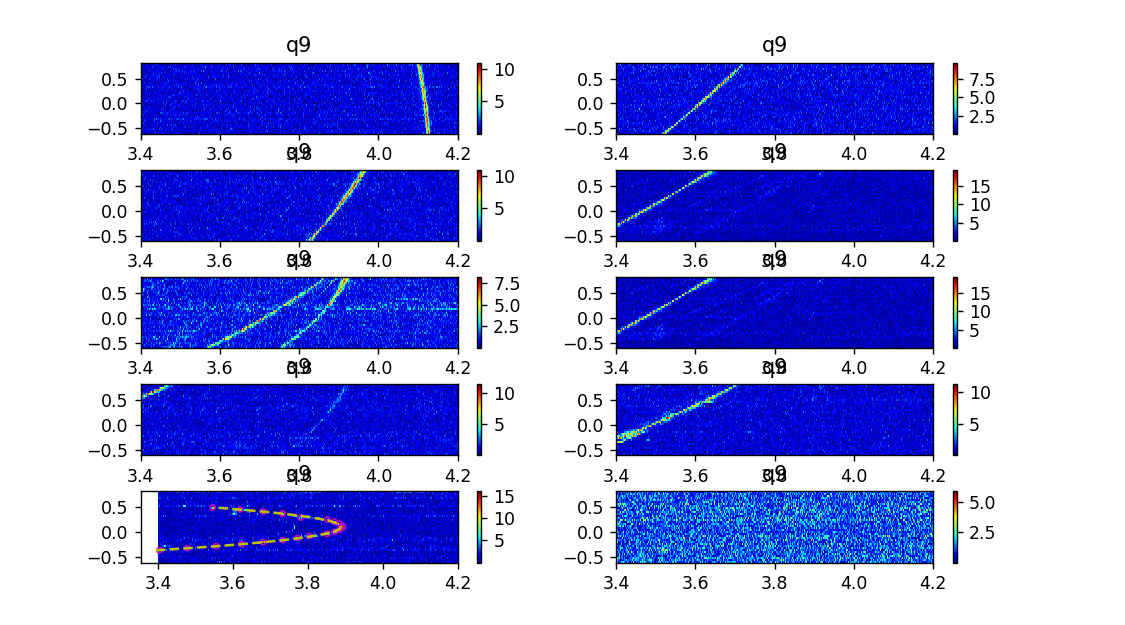

['q9'] 2020-08-10 04:55:00.666965


In [669]:
value,num,tags,finishtime = write(height=1,title='spec2d',which=10,peak=300)
print(tags,finishtime)

In [670]:
target = eval(tags[0][1:])
# target = 1
v, f, s = value[target-1][0][1:], value[target-1][1], value[target-1][2][1:,:]
# s = s[1:,:]
peak = (np.max(np.abs(s))+np.min(np.abs(s))) / 2
f,v,A, C, W, phi = op.Spec2d_Fit(peak=peak).fitSpec2d(v,f,s,classify=False)
v1 = np.linspace(min(v),max(v),1001)
# z = A*np.cos(2*np.pi*W*v1+phi)+C
y = sy.sqrt(A*sy.Abs(sy.cos(W*x+phi))) + C
specfunc[tags[0]] = y
print(specfunc)
z = np.sqrt(A*np.abs(np.cos(W*v1+phi))) + C
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[target-1].scatter(f,v,marker='.',c='',edgecolors='m')
ax[target-1].plot(z,v1,'y--')
plt.show()

{'q9': 2.6120864566074*sqrt(Abs(cos(1.82223321294842*x + 6.09457308523434))) + 1.27602979318111}


In [306]:
np.shape(value[0][1])

(201,)

In [303]:
bit = [q1,q2,q3,q4,q5,q6,q7]
for i, j in enumerate(bit):
    globals()['q%d'%(i+1)] = j._replace(specfunc=specfunc['q%d'%(i+1)])

<IPython.core.display.Javascript object>


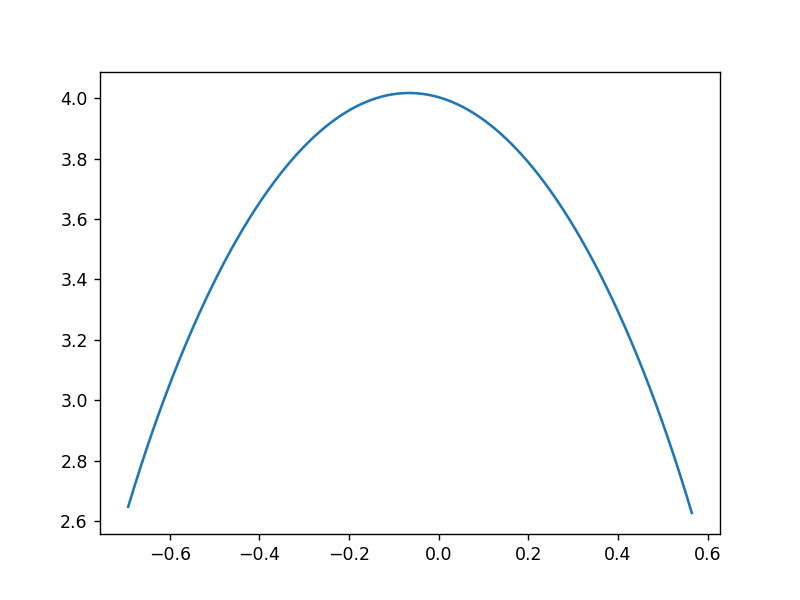

In [301]:
q = q7
func = q.specfunc
y = sy.lambdify(x,func,'numpy')
current = np.linspace(-q.T_bias[0]*0.35,q.T_bias[0]*0.35,1001) + q.T_bias[1] 
plt.figure()
plt.plot(current,y(current))
plt.show()

In [302]:
q7.specfunc

3.905144615239*sqrt(Abs(cos(1.81240734208316*x - 6.16344053243735))) + 0.111988967429575

# 拟合调制曲线找周期

In [543]:
n = 10
Tlist = {}
matrix_cross = np.eye(n) #收集crosstalk矩阵元
matrix_phi = np.eye(n)

<IPython.core.display.Javascript object>


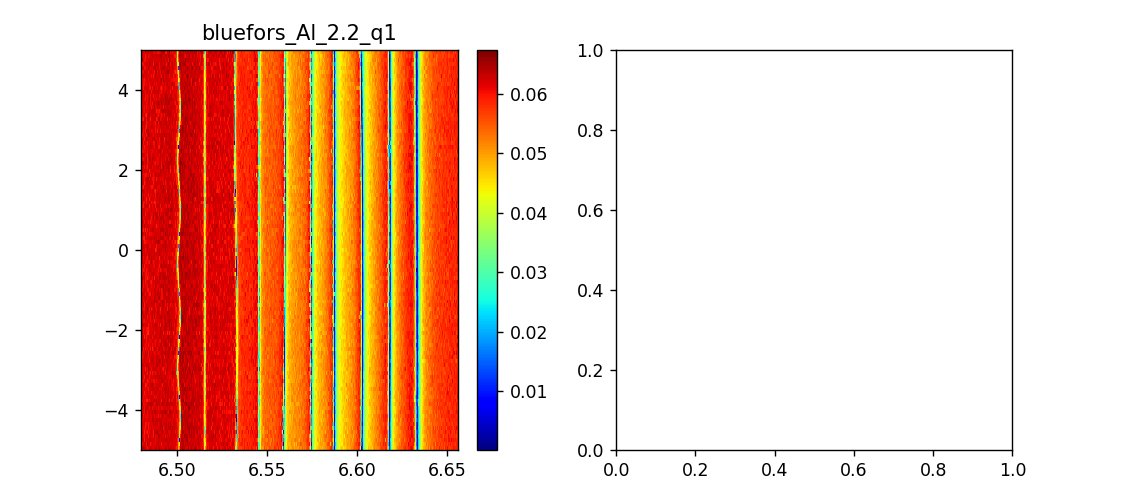

['bluefors_Al_2.2_q1'] 2020-08-25 11:20:39.274527


In [625]:
value,num,tags,finishtime = write(height=4,title='S21vsFlux',which=7,peak=1000) #S21vsFlux_awgoffset
print(tags,finishtime)

In [521]:
6.50184-6.50026

0.0015799999999996928

In [126]:
10*np.log10(5)

6.989700043360188

In [98]:
6.45117-6.44932

0.0018500000000001293

In [81]:
def moving_average(interval, window_size):
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(interval, window, 'same')  # numpy的卷积函数

In [558]:
def fit_cos(tag):
    mat = []
    At = 0
    for i in range(len(value)):
        volt, freq, s = value[i]
        volt, s = volt[2:-2], s[2:-2,:]
        x, y = op.RowToRipe().manipulation(volt,freq,s)
#         y = moving_average(y,5)
#         x, y = x[3:-3], y[3:-3]
        A, C, W, phi = op.Cos_Fit().fitCos(x,y)
        T = 1 / W
        fig = plt.gcf() 
        axes = plt.getp(fig,'axes')
        axes[i].plot(y,x,'ro')
        x1 = np.linspace(min(volt),max(volt),1001)
        y1 = A*np.cos(2*np.pi/T*x1+phi)
        axes[i].plot(y1+C,x1,'b-')
        #if i != int(tag[2:]) - 1:
        t = symbols("t")
        z = A*sy.cos(2*np.pi/T*t+phi)+C
        z_diff = diff(z,t)
        if z_diff.evalf(subs = {t:0}) < 0:
            T *= -1
            if phi<0:
                phi *= -1
        phi = phi % (2*np.pi)
        mat.append((1/T,phi))
        if i == int(tag[2:]) - 1:
            bias0 = op.RowToRipe().firstMax(x1,y1,num=0)
            Tlist[tags[0]] = [round(np.abs(T),3),bias0]
        axes[i].set_title(r'$ q%d,T = %g,phi=%g $' %(i+1,T,phi))
    return mat
        

In [559]:
n_target = eval(tags[0][1:])
mat = fit_cos(tag='q_%d'%n_target)
# matrix_cross[:7,n_target-1] = np.array(mat)[:,0]
# matrix_phi[:7,n_target-1] = np.array(mat)[:,1]
Tlist

{'q8': [1.936, 0.092], 'q3': [1.938, -0.416], 'q1': [2.598, 0.973]}

In [560]:
q1 = q1._replace(T_bias=[2.598, 0.973])

In [187]:
matrix_cross[3,n_target-1] = -1/60
# matrix_phi[0,n_target-1] = 0
matrix_cross

array([[ 0.        ,  0.        ,  0.        ,  0.        , -0.01886792,
        -0.04048476, -0.04381544,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.01646792,
        -0.04206386, -0.04478635,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.01666667,
        -0.03207076, -0.04327996,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.01666667,
        -0.03083636, -0.04220373,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.55179184,
        -0.02814003, -0.03893577,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.02317556,
        -0.56072143, -0.04623969,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.01855807,
         0.01428571, -0.55296654,  0.        

In [229]:
# I0 = -np.mat(matrix_cross).I*np.mat(matrix_phi).mean(axis=1)/2/const.pi
# mat_crosstalk = np.mat([matrix_cross[:,i]/matrix_cross[i,i] if matrix_cross[i][i]!=0 else matrix_cross[i,i]\
#                  for i in range(len(matrix_cross))])
#最终加在qubits上的电流为I = mat_crosstalk.I*[0,0,0,0,1]+I0
save('crosstalk_cali','q1-q7',mat=mat_crosstalk)

In [240]:
for i in range(10):
    if matrix_cross[i][i]!=0:
        mat_crosstalk[:,i] = matrix_cross[:,i]/matrix_cross[i,i] 
    mat_crosstalk[i,i] = 1
    
save('crosstalk_cali','q1-q7',mat=mat_crosstalk)

WindowsPath('D:/QuLabData/2020/0624/crosstalk_cali/q1-q7_20200624171927.npz')

In [241]:
mat_crosstalk

array([[ 1.        ,  0.        ,  0.02081242, -0.00556228, -0.03419392,
         0.0722012 ,  0.07923705,  0.        ,  0.        ,  0.        ],
       [-0.11087751,  1.        ,  0.00911005, -0.03760278, -0.02984445,
         0.07501739,  0.08099287,  0.        ,  0.        ,  0.        ],
       [-0.09237872,  0.        ,  1.        , -0.02808258, -0.03020463,
         0.05719553,  0.07826868,  0.        ,  0.        ,  0.        ],
       [-0.09966487,  0.        ,  0.08454681,  1.        , -0.03020463,
         0.05499408,  0.0763224 ,  0.        ,  0.        ,  0.        ],
       [-0.07804834,  0.        ,  0.07193357, -0.06137783,  1.        ,
         0.0501854 ,  0.07041253,  0.        ,  0.        ,  0.        ],
       [-0.08190848,  0.        ,  0.10309907, -0.06923761,  0.04200055,
         1.        ,  0.08362114,  0.        ,  0.        ,  0.        ],
       [-0.06118311,  0.        ,  0.07212722, -0.06237858,  0.03363237,
        -0.02547738,  1.        ,  0.        

In [100]:
bit = [q1,q3,q6,q8,q10]
for i, j in enumerate(bit,start=0):
    globals()['q%d'%(i+1)] = j._replace(T_bias=Tlist['q%d'%(i+1)])

KeyError: 'q2'

In [101]:
Tlist

{'q10': [0.984, 0.076],
 'q8': [1.844, 0.556],
 'q6': [1.759, 0.3],
 'q3': [1.963, 0.208],
 'q1': [1.132, 0.3]}

In [105]:
q8 = q8._replace(T_bias=[1.844, 0.556])

# 拟合T1

<IPython.core.display.Javascript object>


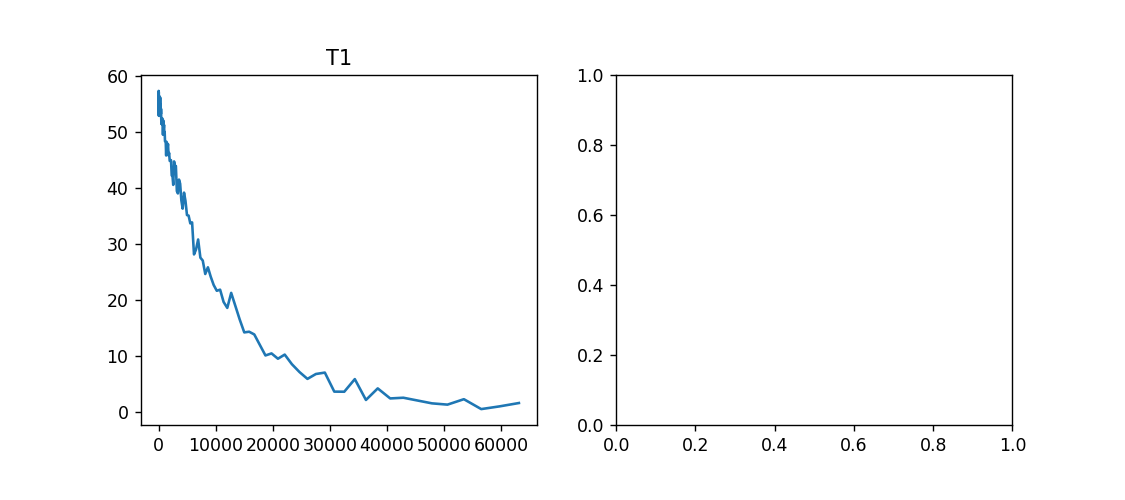

['q6'] 2020-08-24 16:57:06.662723


In [356]:
value,num,tags, finishtime = write(height=4,title='T1',which=0)
print(tags,finishtime)

In [357]:
tag = ''
for i in tags:
    tag += i
save('T1',tag,base_path=r'D:\skzhao\data\ffsu\Nb10bits_2_cuqiang',row=value[0][0],col=value[0][1])

WindowsPath('D:/skzhao/data/ffsu/Nb10bits_2_cuqiang/2020/0824/T1/q6_20200824172031.npz')

In [355]:
x, y = value[0][0], value[0][1]
A, B, T1 = op.Exp_Fit().fitExp(x,np.abs(y))
z = A * np.exp(-x*T1) + B
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[0].plot(x,z)
ax[0].set_title('$T_{1}=%.2fus$'%(1/T1/1e3))
ax[i].set_xlabel('time / ns')
ax[i].set_ylabel('Voltage / a.u.')
plt.show()

TypeError: list indices must be integers or slices, not str

In [218]:
10**4.6

39810.71705534969

# 二维T1

<IPython.core.display.Javascript object>


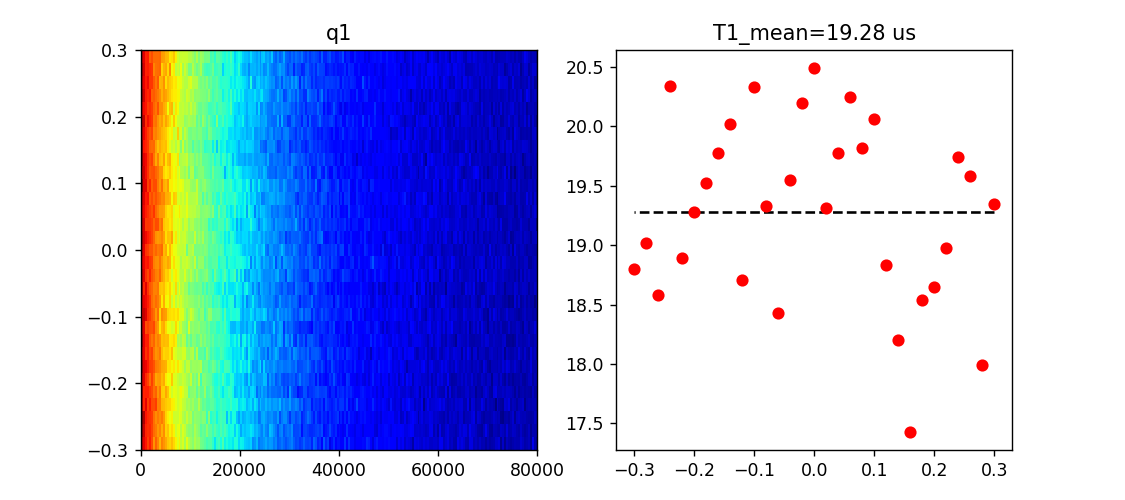

['q1'] 2020-08-11 22:13:46.941292


In [34]:
value,num,tags, finishtime = write(height=4,title='vRabi',which=3)
print(tags,finishtime)

In [35]:
x, y, s = value[0][0],value[0][1], value[0][2]
t1 = []
for i in range(len(x)):
    A, B, T1 = op.Exp_Fit().fitExp(y,np.abs(s[i]))
    t1.append(round(1/T1/1e3,2))
fig = plt.gcf()
ax = plt.getp(fig,'axes')
ax[1].plot(x,t1,'ro')
ax[1].hlines(np.mean(t1),np.max(x),np.min(x),'k','--')
ax[1].set_title('T1_mean=%.2f us'%np.mean(t1))
plt.show()

# 拟合Rabi

<IPython.core.display.Javascript object>


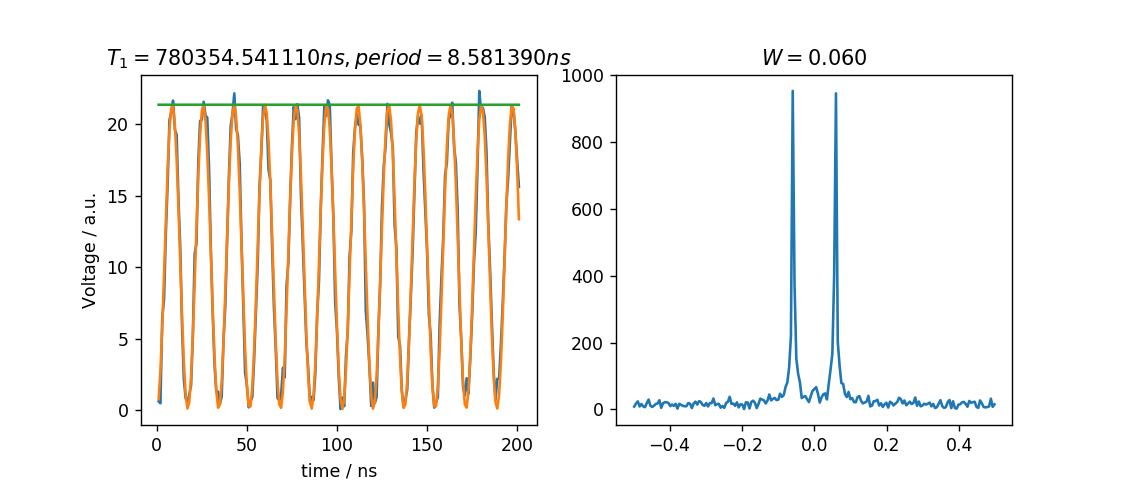

['q3'] 2020-08-26 09:18:27.290792


In [606]:
value,num,tags,finishtime = write(height=4,title='rabi',which=0)
print(tags,finishtime)

In [607]:
fig = plt.gcf()
ax = plt.getp(fig,'axes')
for i in range(num):
    x, y  = value[i][0], value[i][1]
    A,B,T1,w,phi,out = op.Rabi_Fit(envelopemethod='hilbert',phi=0).fitRabi(np.abs(x),np.abs(y))
    z = A*np.exp(-x/T1)*np.cos(2*np.pi*w*x+phi) + B
#     env = out[0]*np.exp(-x/out[2]) + out[1]
    env = A*np.exp(-x/T1) + B
    sample = (np.max(x) - np.min(x))/(len(x) - 1)
    yt  = np.fft.fftshift(np.fft.fftfreq(len(y))) / sample
    amp = np.fft.fftshift(np.fft.fft(y))
    ax[i].plot(x,z)
#     ax[i].plot(x,out[3])
    ax[i].plot(x,env)
    ax[i].set_title('$T_{1}=%fns,period=%fns$'%(T1,1/w/2))
    ax[i].set_xlabel('time / ns')
    ax[i].set_ylabel('Voltage / a.u.')
    ax[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
    ax[1].set_title('$W=%.3f$'%(np.abs(yt[yt!=0][np.argmax(np.abs(amp[yt!=0]))])))
plt.show()

(11.124335604972497, 10.898412236816709, 20000, 0.05970149253731343, 0)


d:\qulab\qulab\optimize.py:316: RuntimeWarning: overflow encountered in exp
  return np.sum((A*np.exp(-x/T1)*np.cos(2*np.pi*w*x+phi) + B - y)**2)
d:\qulab\qulab\optimize.py:316: RuntimeWarning: overflow encountered in square
  return np.sum((A*np.exp(-x/T1)*np.cos(2*np.pi*w*x+phi) + B - y)**2)


In [347]:
tag = ''
for i in tags:
    tag += i
save('Rabi',tag,base_path=r'D:\skzhao\data\ffsu\Nb10bits_2_cuqiang',row=value[0][0],col=value[0][1])

WindowsPath('D:/skzhao/data/ffsu/Nb10bits_2_cuqiang/2020/0824/Rabi/q6_20200824171712.npz')

# 拟合Ramsey及SpinEcho

<IPython.core.display.Javascript object>


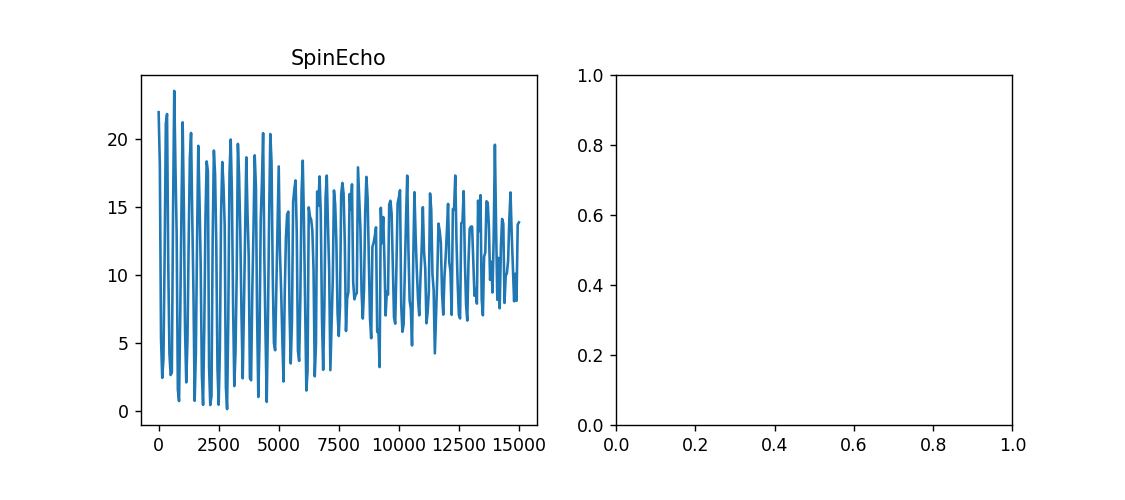

['q3'] 2020-08-26 09:31:04.734398


In [612]:
value,num,tags,finishtime = write(height=4,title='SpinEcho',which=0)
print(tags,finishtime)

In [351]:
tag = ''
for i in tags:
    tag += i
save('SpinEcho',tag,base_path=r'D:\skzhao\data\ffsu\Nb10bits_2_cuqiang',row=value[0][0],col=value[0][1])

WindowsPath('D:/skzhao/data/ffsu/Nb10bits_2_cuqiang/2020/0824/SpinEcho/q6_20200824171804.npz')

In [236]:
fig = plt.gcf()
ax = plt.getp(fig,'axes')
for i in range(num):
    x, y  = value[i][0], value[i][1]
    sample = (np.max(x) - np.min(x))/(len(x) - 1)
    yt  = np.fft.fftshift(np.fft.fftfreq(len(y))) / sample
    amp = np.fft.fftshift(np.fft.fft(y))
    A,B,T1,T2,w,phi,out = op.T2_Fit(T1=10000,funcname='gauss',envelopemethod='hilbert').fitT2(x,np.abs(y))
    z = A*np.exp(-(x/T2)**2-x/T1/2)*np.cos(2*np.pi*w*x+phi) + B
    z_env = A*np.exp(-(x/T2)**2-x/T1/2) + B
    env = out[0]*np.exp(-(x/out[3])**2-x/out[2]/2)+out[1]
    ax[i].plot(x,z)
    ax[i].plot(x,z_env)
#     ax[i].plot(x,out[-1])
    #ax[i].set_title('$T_{1}=%f,T_{2}=%f,w=%f$'%(T1,T2,w*1e3))
    ax[i].set_title('$T_{2}^{*}=%.2fns,\omega=%.2fMHz$'%(T2,w*1e3))
    ax[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
    ax[i].set_xlabel('time / ns')
    ax[i].set_ylabel('Voltage / a.u.')
plt.show()

(14.883005398443409, 6.075926991948453, 10000, 14163.121127488894, 0.0028855721393034827, 0)


## 指数拟合

In [260]:
fig = plt.gcf()
ax = plt.getp(fig,'axes')
for i in range(num):
    x, y  = value[i][0], value[i][1]
    A,B,T1,w,phi,out = op.Rabi_Fit(envelopemethod='hilbert',phi=0).fitRabi(np.abs(x),np.abs(y))
    z = A*np.exp(-x/T1)*np.cos(2*np.pi*w*x+phi) + B
#     env = out[0]*np.exp(-x/out[2]) + out[1]
    env = A*np.exp(-x/T1) + B
    sample = (np.max(x) - np.min(x))/(len(x) - 1)
    yt  = np.fft.fftshift(np.fft.fftfreq(len(y))) / sample
    amp = np.fft.fftshift(np.fft.fft(y))
    ax[i].plot(x,z)
#     ax[i].plot(x,out[3])
    ax[i].plot(x,env)
    ax[i].set_title('$exp-fit,T_{2}=%.2fns$'%T1)
    ax[i].set_xlabel('time / ns')
    ax[i].set_ylabel('Voltage / a.u.')
    ax[1].plot(yt[yt!=0],np.abs(amp[yt!=0]))
    ax[1].set_title('$W=%.3f$'%(np.abs(yt[yt!=0][np.argmax(np.abs(amp[yt!=0]))])))
plt.show()

(11.588886743735708, 18.66704381597806, 20000, 0.0029900332225913625, 0)


In [248]:
1/(1/4.75-1/16)

6.755555555555556

# ramseyZpulse

<IPython.core.display.Javascript object>


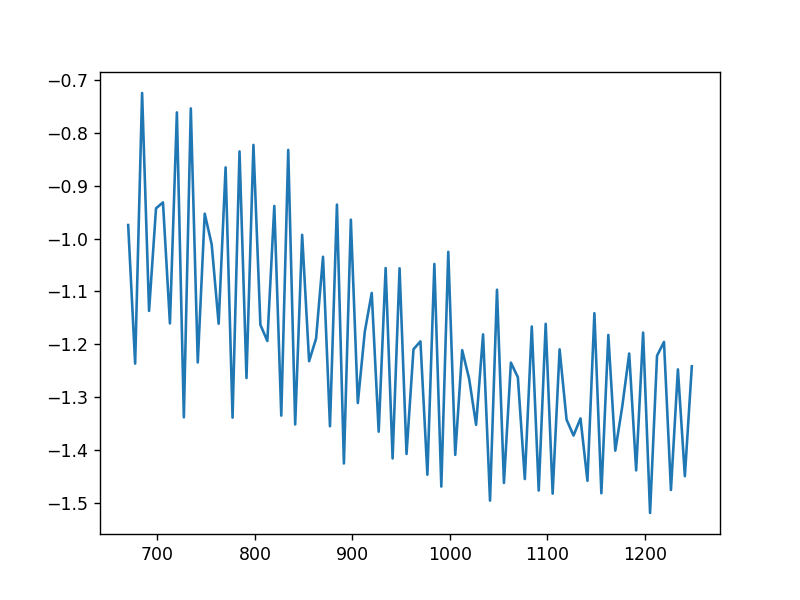

In [94]:
data, ID, comment, tags, name = read(title='ramseyZpulse',which=0)
x, y = data[0], data[1]
coordinate = [[1-2*j[i] for i in range(2)] for j in y]
theta = np.array([np.arctan(i[1]/i[0]) for i in coordinate])
plt.figure()
plt.plot(x[:,0],-theta)
plt.show()

In [107]:
async def exMixing(f):
    qname = [i for i in f]
    f_ex = np.array([f[i] for i in f])
    ex_lo = f_ex.mean() + 50e6
    delta =  ex_lo - f_ex
    delta_ex = {qname[i]:delta[i] for i in range(len(qname))}
    # n = len(f_ex)
    return ex_lo, delta_ex

In [109]:
f_ex1, f_ex2 = {'f1':4e9},{'f2':3e9}
ex_lo1, delta_ex1 = await exMixing(f_ex1)
ex_lo2, delta_ex2 = await exMixing(f_ex2)

In [113]:
{**delta_ex1,**delta_ex2}

{'f1': 50000000.0, 'f2': 50000000.0}

<IPython.core.display.Javascript object>


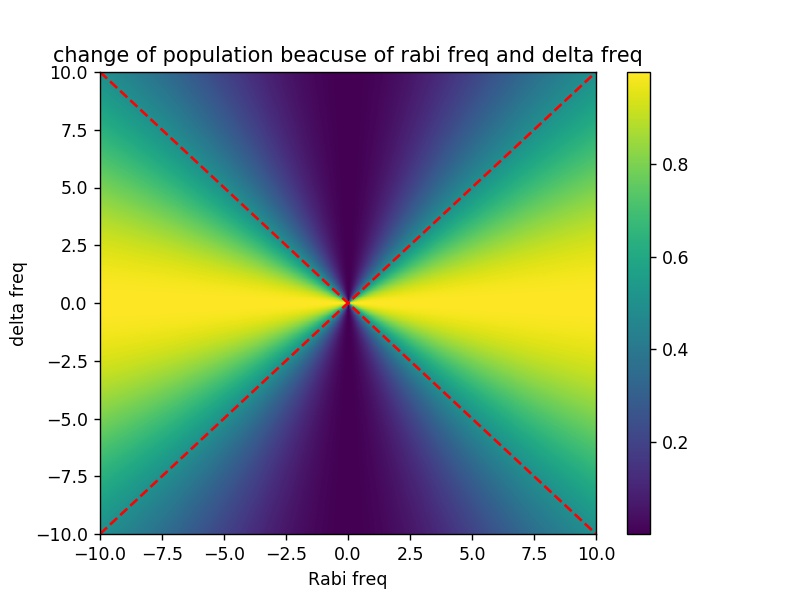

In [722]:
x = np.linspace(-10,10,1000)
z = np.linspace(-10,10,1000)
y = [x**2/(x**2+i**2) for i in z]
plt.figure()
plt.imshow(y,aspect='auto',origin='lower',extent=[min(x),max(x),min(z),max(z)])
plt.plot([-10,10],[-10,10],'r--')
plt.plot([-10,10],[10,-10],'r--')
plt.xlabel('Rabi freq')
plt.ylabel('delta freq')
plt.title('change of population beacuse of rabi freq and delta freq')
plt.colorbar()
plt.show()

In [515]:
def test(y,z=0,l=0):
    return y+z+l

In [516]:
def f(x,func,**kw):
    h = func(**kw)
    print('lala=',kw['l'])
    print(h+1)

In [518]:
f(10,test,y=1,z=2,l=11)

TypeError: f() takes 2 positional arguments but 3 were given

In [489]:
def f(l=[]):
    l.append(1)
    return l

In [490]:
f(l=['qq1'])

['qq1', 1]

In [491]:
f(l=['q2'])

['q2', 1]

In [492]:
f()

[1]

In [519]:
x = np.arange(0,1,0.01)

In [523]:
isinstance(x,np.ndarray)

True

In [533]:
f1, f2 = {}, {}

In [534]:
f2['q1'] = 1

In [535]:
f1

{}

In [25]:
def predistort(waveform, sRate, zCali):
    """Predistort input waveform.
    Parameters
    ----------
        waveform : complex numpy array
            Waveform data to be pre-distorted
        zCali: [2.55e-9, -28e-3, 8.02e-9, -28e-3, 101.5e-9, -14.5e-3,369.7e-9,-6.2e-3]
    Returns
    -------
    waveform : complex numpy array
        Pre-distorted waveform
    """
    dt = 1 / sRate
    wf_size = len(waveform)
    tau1, A1, tau2, A2, tau3, A3, tau4, A4, tau5, A5 = zCali
    print('tau:', tau1, A1, tau2, A2, tau3, A3, tau4, A4, tau5, A5)
    # pad with zeros at end to make sure response has time to go to zero
    # pad_time = 6 * max([tau1, tau2, tau3])
    pad_time = 4e-6  # 这里默认改为增加4us的pad，返回时舍去1us，保留3us拖尾
    pad_size = round(pad_time / dt)
    pad_size_2 = round(3e-6 / dt)  # 保留的点数
    padded_zero = np.zeros(pad_size)
    padded = np.append(waveform,padded_zero)

    Y = np.fft.rfft(padded, norm='ortho')

    omega = 2 * np.pi * np.fft.rfftfreq(wf_size+pad_size, dt)
    H = (1 + (1j * A1 * omega * tau1) / (1j * omega * tau1 + 1) +
         (1j * A2 * omega * tau2) / (1j * omega * tau2 + 1) +
         (1j * A3 * omega * tau3) / (1j * omega * tau3 + 1) +
         (1j * A4 * omega * tau4) / (1j * omega * tau4 + 1)+
         (1j * A5 * omega * tau5) / (1j * omega * tau5 + 1))

    Yc = Y / H
    yc = np.fft.irfft(Yc, norm='ortho')
    # return yc[:wf_size]
    #这里返回增加了3us拖尾的序列
    return yc[:(wf_size+pad_size_2)]

In [1757]:
250000-7500

242500

tau: 2.55e-09 -0.028 8.02e-09 -0.028 1.015e-07 -0.0145 3.697e-07 -0.0062 5e-09 -0.005


<IPython.core.display.Javascript object>


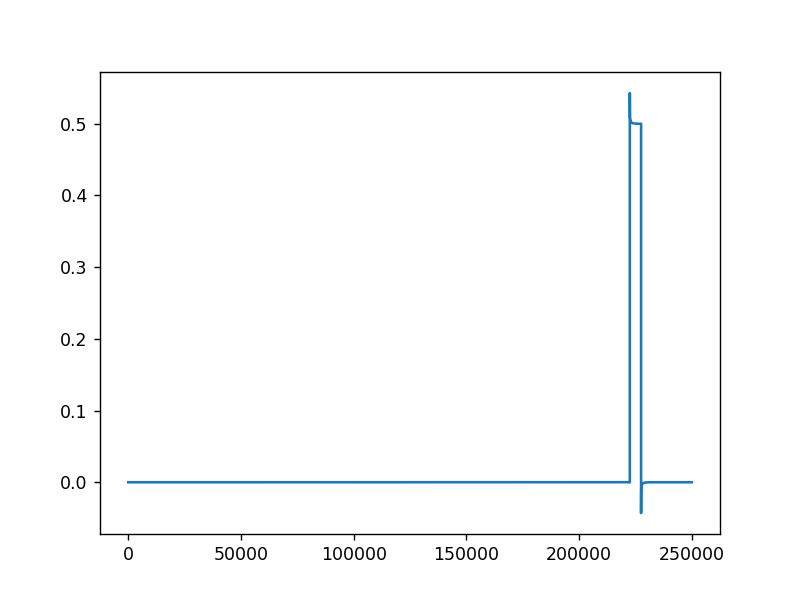

In [39]:
t = np.linspace(-90000,7000,242500)*1e-9
w = wn.square(2000e-9)*0.5
wave = w(t)
I = predistort(wave,2.5e9,[2.55e-9, -28e-3, 8.02e-9, -28e-3, 101.5e-9, -14.5e-3,369.7e-9,-6.2e-3,5e-9,-5e-3])
plt.figure()
plt.plot(I)
plt.show()

In [34]:
len(np.array((np.arange(10),))+np.array((np.arange(10),)))

1

In [16]:
z_new = a*b*np.exp(b*x) + c*d*np.exp(d*x) 
# z_new = z_new/np.max(np.abs(z_new))
# x = Twoexp(para,t)
def hfunc(x):
    global z_new
#     y = (a*b*np.exp(b*x) + c*d*np.exp(d*x))/np.max(np.abs(a*b*np.exp(b*x) + c*d*np.exp(d*x)))
    
    H = np.fft.fft(z_new) + 1/2/np.pi
    h = np.fft.ifft(H)
    return h, H

In [17]:
t = np.linspace(-90000,10000,250000)
w = wn.square(5000)
wave = w(t)
h, H = hfunc(t)
wave_cali = np.convolve(wave,h,'same')

In [1696]:
h, H = hfunc(t)
wave_cali = np.fft.irfft(np.fft.rfft(wave)/H)

C:\WPy64-3740\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


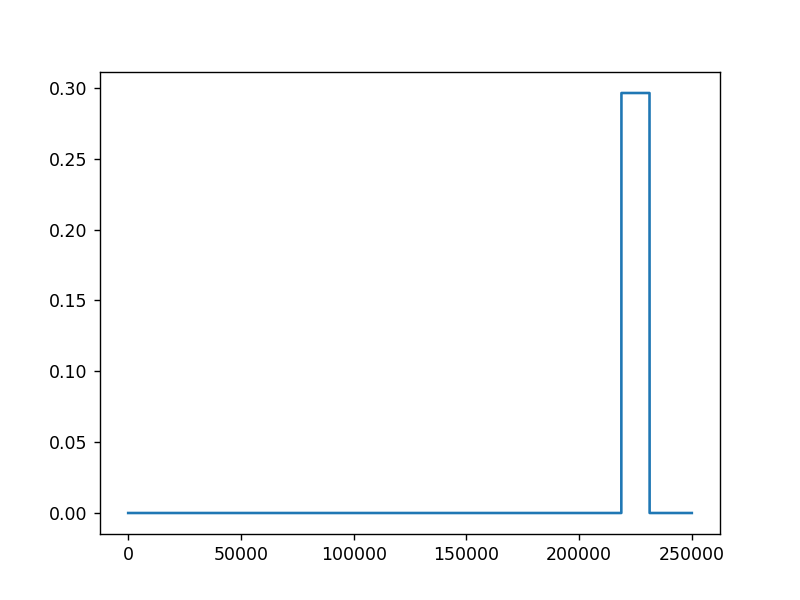

In [19]:
plt.figure()
plt.plot(np.abs(wave_cali))
plt.show()

In [82]:
# help(np.convolve)

# 处理html文件

In [484]:
from qulab import getplotlydat
gpd = imp.reload(getplotlydat)

In [469]:
htmlfile = open(r'D:\step1\14Q1changePwr.html', 'r', encoding='utf-8')
htmlhandle = htmlfile.read()

In [470]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(htmlhandle, 'lxml')

In [485]:
path = r'D:\step1\14Q1changePwr.html'
x, y, z = gpd.gethtmldata(path,flag='x'), gpd.gethtmldata(path,flag='y'), gpd.gethtmldata(path,flag='z')

In [493]:
z

array([[0.25921025, 0.2589861 , 0.25909383, ..., 0.2533441 , 0.25334662,
        0.25340373],
       [0.25950217, 0.25931113, 0.25550537, ..., 0.25340873, 0.25333372,
        0.25326414],
       [0.25958915, 0.25932828, 0.25928068, ..., 0.25320511, 0.25345128,
        0.2534569 ],
       ...,
       [0.25974786, 0.25973037, 0.26020824, ..., 0.25340719, 0.25254082,
        0.2534899 ],
       [0.25935685, 0.25878079, 0.25919945, ..., 0.25312764, 0.25421194,
        0.25381986],
       [0.26031712, 0.26065906, 0.25937801, ..., 0.25353294, 0.25337955,
        0.25378972]])

<IPython.core.display.Javascript object>


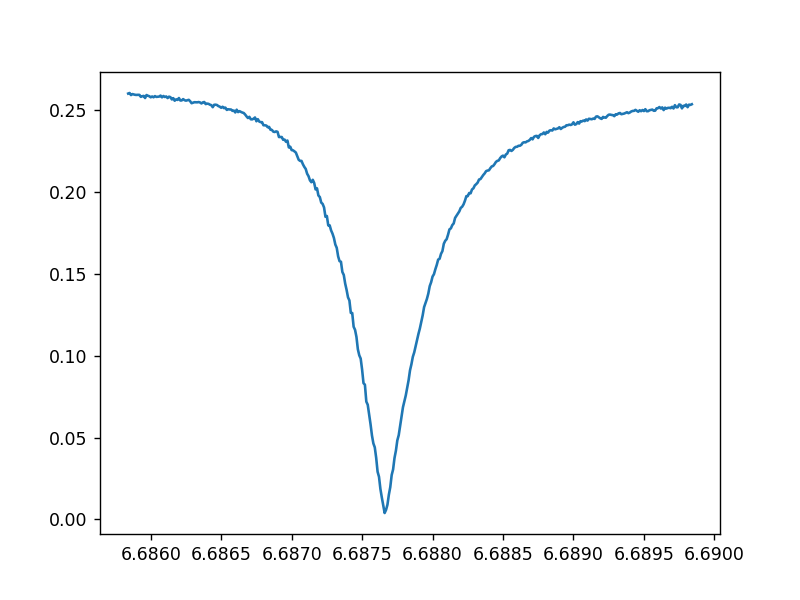

In [492]:
plt.figure()
plt.plot(x[0,:],z[-1])
plt.show()

In [461]:
gpd.initfile(path)[4]-gpd.initfile(path)[3]

422702

In [266]:
data = soup.find('div',{'class':"plotly-graph-div"})
data

<div class="plotly-graph-div" id="9a8d02f7-44bb-4595-8eb9-130b36381b22" style="height:100%; width:100%;"></div>

In [267]:
# help(data)

In [471]:
soup

<html>
<head><meta charset="utf-8"/></head>
<body>
<div>
<script type="text/javascript">window.PlotlyConfig = {MathJaxConfig: 'local'};</script>
<script type="text/javascript">/**
* plotly.js v1.48.1
* Copyright 2012-2019, Plotly, Inc.
* All rights reserved.
* Licensed under the MIT license
*/
!function(t){if("object"==typeof exports&&"undefined"!=typeof module)module.exports=t();else if("function"==typeof define&&define.amd)define([],t);else{("undefined"!=typeof window?window:"undefined"!=typeof global?global:"undefined"!=typeof self?self:this).Plotly=t()}}(function(){return function(){return function t(e,r,n){function i(o,s){if(!r[o]){if(!e[o]){var l="function"==typeof require&&require;if(!s&&l)return l(o,!0);if(a)return a(o,!0);var c=new Error("Cannot find module '"+o+"'");throw c.code="MODULE_NOT_FOUND",c}var u=r[o]={exports:{}};e[o][0].call(u.exports,function(t){return i(e[o][1][t]||t)},u,u.exports,t,e,r,n)}return r[o].exports}for(var a="function"==typeof require&&require,o=0;o<n.

In [199]:
f0, Qi, Qe, QL, phi, f, s = op.Cavity_fit().fitCavity(f,s21)

0.0003599999999996939


In [191]:
f0, Qi, Qe, QL, phi

(6.391316859672923,
 22621.98170102801,
 9125.835246856113,
 6502.635387493445,
 0.2938967941595496)

<IPython.core.display.Javascript object>


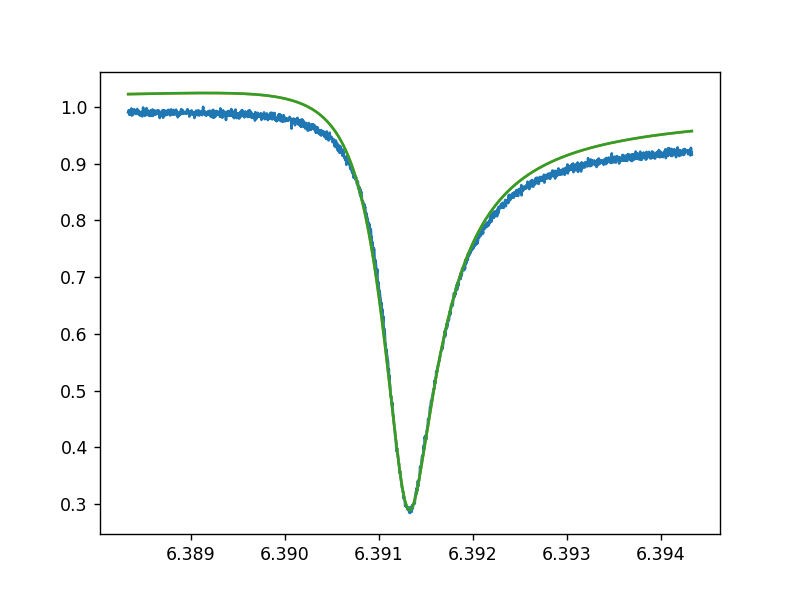

In [201]:
plt.figure()
plt.plot(f,np.abs(s))
plt.plot(f,1/np.abs(op.Cavity_fit().invS21(f, f0, Qi, Qe, phi)))
plt.show()

In [166]:
6.39176-6.39103

0.0007299999999998974